<a href="https://colab.research.google.com/github/justingardner/tutorials/blob/master/bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning goals for the Bayesian notebook.  After working through this notebook you will be able to...
  * compute the entropy of a spike train

In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as progressBar

Compute entropy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, '$-p\\log_{2}{p}-(1-p)\\log_{2}{1-p}$')

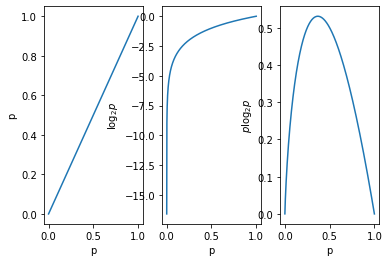

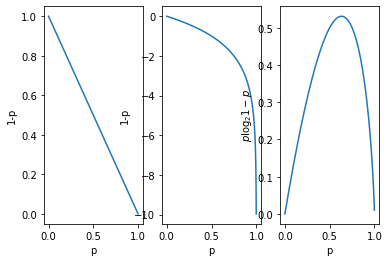

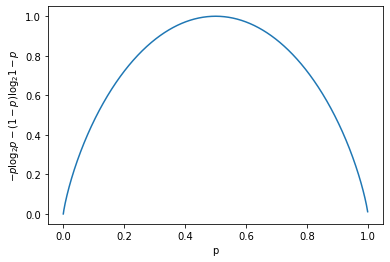

In [ ]:
p = np.linspace(0.00001,1,1000)

plt.subplot(1,3,1)
plt.plot(p,p)
plt.xlabel('p')
plt.ylabel('p')
plt.subplot(1,3,2)
plt.plot(p,np.log2(p))
plt.xlabel('p')
plt.ylabel('$\log_{2}{p}$')
plt.subplot(1,3,3)
plt.plot(p,-p*np.log2(p))
plt.xlabel('p')
plt.ylabel('$p\log_{2}{p}$')

plt.figure()
plt.subplot(1,3,1)
plt.plot(p,(1-p))
plt.xlabel('p')
plt.ylabel('1-p')
plt.subplot(1,3,2)
plt.plot(p,np.log2(1-p))
plt.xlabel('p')
plt.ylabel('1-p')
plt.subplot(1,3,3)
plt.plot(p,-(1-p)*np.log2(1-p))
plt.xlabel('p')
plt.ylabel('$p\log_{2}{1-p}$')

plt.figure()
plt.plot(p,-p*np.log2(p)-(1-p)*np.log2(1-p))
plt.xlabel('p')
plt.ylabel('Bits ($-p\log_{2}{p}-(1-p)\log_{2}{1-p}$)')

plt.savefig('entropy.pdf')

Following Barlow, we want to figure out how much information can be sent down a spiking fiber.

Two things need to be defined. 


1.   R, the number of discrete time intervals per second. If this number is 1, then we just compute the number of spikes in the fiber over 1 second. If it is 10, we do that ten times a second (so we can get information every 100ms). 
2.   I, the average number of spikes per second. Say 10 spikes/second. If the number is lower, then less information can be sent. If the number is higher more information can be sent.

Now, we could compute the number of spikes per interval as:

Average spikes per time interval: $\frac{I}{R}$

The assumption that Barlow is using is that this is a number less than 1 (which you can always guarantee by considering a larger number of discrete time intervals per second R). So, you can think about is as the probabiity that a spike will occur in one time interval (which we will call $p_{spike}$):

Eq 1: $p_{spike}$ = $\frac{I}{R}$

Now, let's compute the entropy of the channel. Remember that entropy is computed as

Eq 2: $H=-\sum_{i}p_{i}log_{2}{p_{i}}$

So, there are two states (i in the equation above) to consider. The state in which a spike occured and the state in which a spike did not occur. So the channel entropy per time interval is:

$H=-p_{spike} \log_{2}{p_{spike}} -p_{nospike} \log_{2}{p_{nospike}} $

Well, the probability of not having a spike is just 1-$p_{spike}$, so:

$H=-p_{spike} \log_{2}{p_{spike}} -(1-p_{spike}) \log_{2}{(1-p_{spike})} $

Ok. Now we just need to subsitute Eq 1, our definition for the probability of getting a spike into the equation above.

$H=-\frac{I}{R} \log_{2}{\frac{I}{R}} -(1-\frac{I}{R}) \log_{2}{(1-\frac{I}{R})} $

Now, Barlow computes this as a unit of time (i.e. how much entropy over a second), which you can just get by multiplying the above by the number of intervals per second R. He also multiplies by the number of fibers F. To get the expression in the paper for channel capacity C. 

$C=-FR[\frac{I}{R} \log_{2}{\frac{I}{R}} +(1-\frac{I}{R}) \log_{2}{(1-\frac{I}{R})}]$






